In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data File and Read
crime = "Cleaned_Crime_Data.csv"
crime_df = pd.read_csv(crime)
crime_df

,Unnamed: 0,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,0,ALABAMA,HUNTSVILLE,2015,190106,723,5,65,173,480,4121,836,2903,382,0
1,1,ALASKA,ANCHORAGE,2015,301239,1615,16,323,271,1005,5732,811,4516,405,63
2,2,ARIZONA,CHANDLER,2015,258875,206,0,26,51,129,2524,384,2033,107,26
3,3,ARIZONA,GILBERT,2015,247324,95,2,14,14,65,1628,253,1310,65,12
4,4,ARIZONA,MESA,2015,471034,1019,6,142,219,652,5995,1041,4591,363,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1077,WASHINGTON,SPOKANE,2018,217066,791,4,179,105,503,7371,958,5616,797,19
1078,1078,WASHINGTON,TACOMA,2018,213504,950,7,84,257,602,5641,963,3674,1004,46
1079,1079,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20
1080,1080,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3


In [3]:
# Delete Unnecessary Column
del crime_df["Unnamed: 0"]
crime_df.reset_index()
crime_df

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,ALABAMA,HUNTSVILLE,2015,190106,723,5,65,173,480,4121,836,2903,382,0
1,ALASKA,ANCHORAGE,2015,301239,1615,16,323,271,1005,5732,811,4516,405,63
2,ARIZONA,CHANDLER,2015,258875,206,0,26,51,129,2524,384,2033,107,26
3,ARIZONA,GILBERT,2015,247324,95,2,14,14,65,1628,253,1310,65,12
4,ARIZONA,MESA,2015,471034,1019,6,142,219,652,5995,1041,4591,363,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,WASHINGTON,SPOKANE,2018,217066,791,4,179,105,503,7371,958,5616,797,19
1078,WASHINGTON,TACOMA,2018,213504,950,7,84,257,602,5641,963,3674,1004,46
1079,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20
1080,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3


In [4]:
# Change Formatting for Specific Columns
cols = ["Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"]

# Format Float Values
crime_df[cols] = crime_df[cols].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [5]:
crime_df = crime_df.astype({"Violent Crime": int, "Murder": int, "Rape": int, "Robbery": int, "Assault": int, "Property": int,
                           "Burglary": int, "Larceny": int, "MV Theft": int, "Arson": int})

In [6]:
# Create copy to not change original df
nat_stats = crime_df.copy()

# Summation for national statistics
year_national = nat_stats.groupby("Year").sum()
year_national = year_national.reset_index()
year_national

,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,2015,82154806,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893
1,2016,82154806,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434
2,2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052
3,2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233


In [7]:
# Add Total Column
year_nat_total = year_national.copy()

year_nat_total["Total"] = year_nat_total[cols].sum(axis=1)
year_nat_total

,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson,Total
0,2015,82154806,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893,3056875
1,2016,82154806,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434,3090844
2,2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052,3257861
3,2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233,3112679


In [8]:
# Drop Population for Crime Totals Graph
no_pop = year_national.copy()
del no_pop["Population"]
no_pop

,Year,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,2015,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893
1,2016,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434
2,2017,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052
3,2018,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233


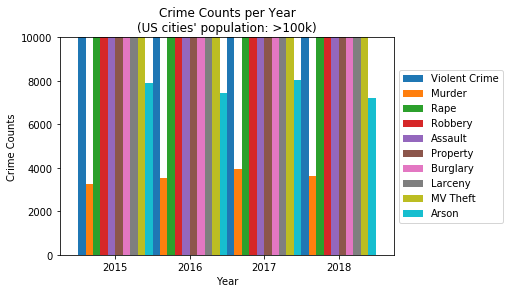

<Figure size 14400x10800 with 0 Axes>

In [9]:
# Graph
ax = no_pop.plot.bar(x="Year", width=1)

plt.figure(figsize=(200,150))

ax.set_ylim(0, 10000)
ax.set_ylabel("Crime Counts")
ax.set_title("Crime Counts per Year\n(US cities' population: >100k)")
ax.set_xticklabels(labels=[2015, 2016, 2017, 2018], rotation="horizontal")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

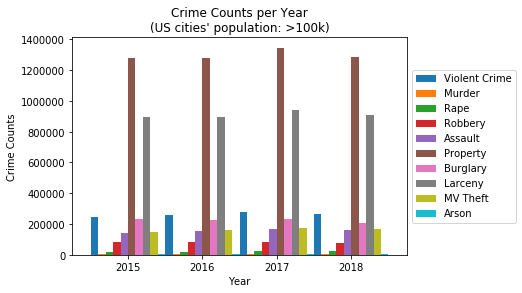

<Figure size 14400x10800 with 0 Axes>

In [10]:
# Graph2
# Graph
ax = no_pop.plot.bar(x="Year", width=1)

plt.figure(figsize=(200,150))

ax.set_ylabel("Crime Counts")
ax.set_title("Crime Counts per Year\n(US cities' population: >100k)")
ax.set_xticklabels(labels=[2015, 2016, 2017, 2018], rotation="horizontal")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Text(0, 0.5, 'Murder Counts')

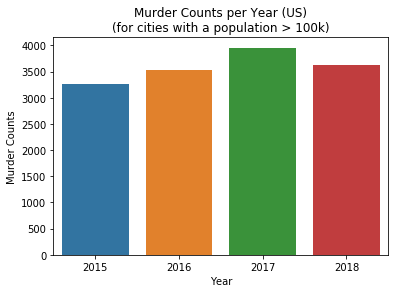

In [11]:
# Plotting National Murder Counts
g1 = sns.barplot(x="Year", y="Murder", data=year_national)
plt.title("Murder Counts per Year (US)\n(for cities with a population > 100k)")
plt.ylabel("Murder Counts")

Text(0, 0.5, 'Total Crime Counts')

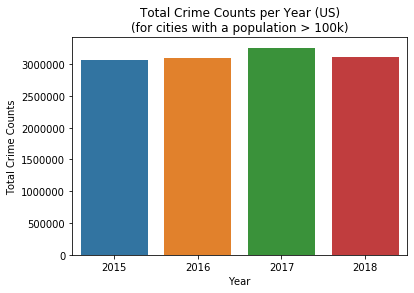

In [12]:
# Plotting National Total Crime Counts
g2 = sns.barplot(x="Year", y="Total", data=year_nat_total)
plt.title("Total Crime Counts per Year (US)\n(for cities with a population > 100k)")
plt.ylabel("Total Crime Counts")

In [13]:
# Virigina Scatterplots
# Specify Rows to Keep
test = crime_df.copy()

# Keep Virigina
VA = test.copy()
VA_only = VA.query('State == "VIRGINIA"')
print(VA_only.shape)
VA_only

(28, 14)


,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
245,VIRGINIA,ALEXANDRIA,2015,152710,131,0,11,53,67,1350,113,1133,104,1
246,VIRGINIA,CHESAPEAKE,2015,235273,488,6,31,81,370,2810,463,2185,162,14
247,VIRGINIA,HAMPTON,2015,136381,155,7,16,71,61,1989,289,1555,145,14
248,VIRGINIA,NEWPORT NEWS,2015,182975,344,17,35,98,194,2522,438,1918,166,25
249,VIRGINIA,NORFOLK,2015,245400,629,7,58,202,362,4141,522,3473,146,13
250,VIRGINIA,RICHMOND,2015,220802,553,16,32,236,269,3645,682,2640,323,32
251,VIRGINIA,VIRGINIA BEACH,2015,452797,316,12,52,128,124,4625,505,3931,189,49
509,VIRGINIA,ALEXANDRIA,2016,152710,137,3,12,61,61,1306,85,1089,132,5
510,VIRGINIA,CHESAPEAKE,2016,235273,416,7,37,95,277,2979,318,2491,170,11
511,VIRGINIA,HAMPTON,2016,136381,174,10,19,73,72,2012,245,1637,130,6


<Figure size 14400x10800 with 0 Axes>

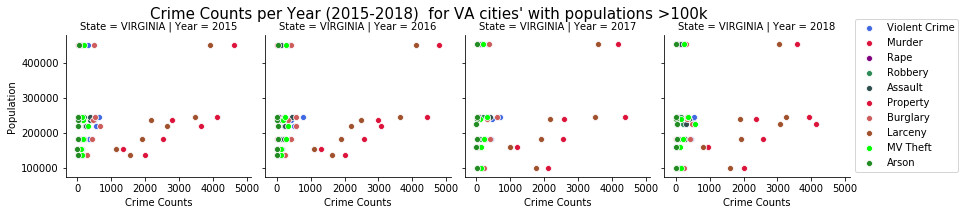

<Figure size 14400x10800 with 0 Axes>

In [14]:
# Plot VA Data
va1 = sns.FacetGrid(VA_only, col="Year", row="State")
va1.map(sns.scatterplot, "Violent Crime", "Population", color='royalblue')
va1.map(sns.scatterplot, "Murder", "Population", color='crimson')
va1.map(sns.scatterplot, "Rape", "Population", color='purple')
va1.map(sns.scatterplot, "Robbery", "Population", color='seagreen')
va1.map(sns.scatterplot, "Assault", "Population", color='darkslategrey')
va1.map(sns.scatterplot, "Property", "Population", color='crimson')
va1.map(sns.scatterplot, "Burglary", "Population", color='indianred')
va1.map(sns.scatterplot, "Larceny", "Population", color='sienna')
va1.map(sns.scatterplot, "MV Theft", "Population", color='lime')
va1.map(sns.scatterplot, "Arson", "Population", color='forestgreen')
va1.set_axis_labels("Crime Counts")

plt.subplots_adjust(top=0.85)
plt.suptitle("Crime Counts per Year (2015-2018)  for VA cities' with populations >100k", fontsize=15)
plt.legend(["Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"],
           loc='best', bbox_to_anchor=(1, 1.15))

plt.figure(figsize=(200,150))